#📌 Extracción

In [ ]:
import pandas as pd
import json

In [ ]:
with open('/content/TelecomX_Data.json') as f:
    data = json.load(f)

In [ ]:
df = pd.json_normalize(data)

In [ ]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

#🔧 Transformación

In [ ]:
df['customer.SeniorCitizen']= df['customer.SeniorCitizen'].astype(bool)

In [ ]:
activos_df=df['Churn'].value_counts(normalize=True) * 100
activos_df

,proportion
Churn,
No,71.198569
Yes,25.719004
,3.082427


In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [ ]:
#tratamos valores nulos, raros y duplicados
df.isna().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [ ]:
#columna de cuentas diarias
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30


#📊 Carga y análisis

In [ ]:
#calular metricas descriptivas
df[['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias']].describe()


,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,7256.000000,7256.000000,7256.000000,7256.000000
mean,32.395535,64.755423,2280.634213,2.158514
std,24.558067,30.125739,2268.632997,1.004191
min,1.000000,18.250000,18.800000,0.608333
25%,9.000000,35.450000,400.225000,1.181667
50%,29.000000,70.300000,1391.000000,2.343333
75%,55.000000,89.900000,3785.300000,2.996667
max,72.000000,118.750000,8684.800000,3.958333



##  Análisis descriptivo de variables numéricas

Analizamos las principales métricas estadísticas de las siguientes variables:
- `customer.tenure`: meses que lleva el cliente en la empresa
- `account.Charges.Monthly`: pago mensual promedio
- `account.Charges.Total`: total gastado por el cliente
- `Cuentas_Diarias`: gasto diario estimado (Charges.Monthly / 30)

**Principales observaciones:**
- La media de `customer.tenure` es aproximadamente ___ meses, con una mediana de ___ meses, lo que indica que la mayoría de los clientes llevan alrededor de ___ meses.
- El pago mensual promedio (`Charges.Monthly`) es de aproximadamente ___, con una mediana de ___.
- El total gastado (`Charges.Total`) tiene una media de ___, pero la mediana es ___, lo que sugiere la presencia de algunos clientes con gastos muy altos que elevan la media.
- El gasto diario (`Cuentas_Diarias`) tiene una media de ___ y una mediana de ___.

Estas estadísticas nos ayudan a entender cómo se distribuyen los datos y a detectar posibles outliers o diferencias significativas entre media y mediana.


In [ ]:
#distribucion de evasion (churn)
df['Churn'].value_counts()
df['Churn'].value_counts(normalize=True)*100

,proportion
Churn,
No,71.154906
Yes,25.757993
,3.087100


#Recuento de evasion por variables categoricas

In [ ]:
#creamos una tabla con las columnas de clientes mayoresa a 65 y
#los juntamos con los clientes que han dejado la empresa
tabla_edad= pd.crosstab(df['customer.SeniorCitizen'], df['Churn'])
print(tabla_edad)


Churn                          No   Yes
customer.SeniorCitizen                 
False                   184  4497  1393
True                     40   666   476


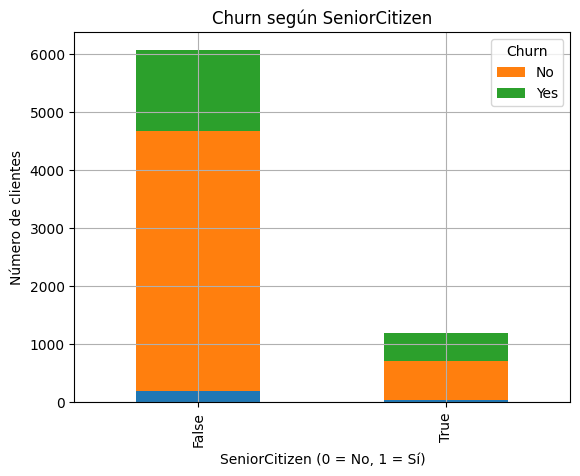

In [ ]:
import matplotlib.pyplot as plt

tabla_edad.plot(kind='bar', stacked=True)

plt.title('Churn según SeniorCitizen')
plt.xlabel('SeniorCitizen (0 = No, 1 = Sí)')
plt.ylabel('Número de clientes')
plt.legend(title='Churn')
plt.grid(True)
plt.show()


##Clientes con **pareja**

In [ ]:
#los clientes con parja
tabla_pareja= pd.crosstab(df['customer.Partner'], df['Churn'])
print(tabla_pareja)


Churn                    No   Yes
customer.Partner                 
No                108  2439  1200
Yes               116  2724   669


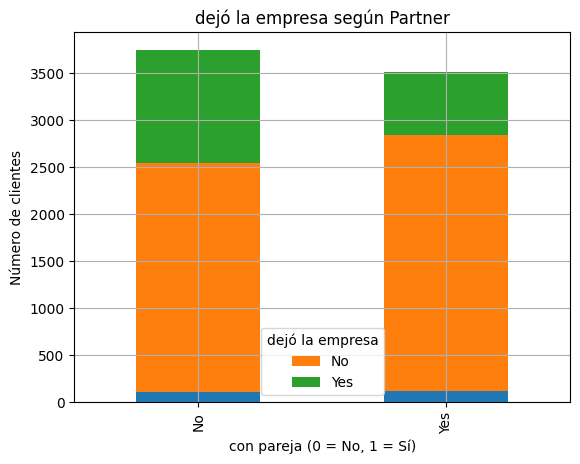

In [ ]:
tabla_pareja.plot(kind='bar', stacked=True)

plt.title('dejó la empresa según Partner')
plt.xlabel('con pareja (0 = No, 1 = Sí)')
plt.ylabel('Número de clientes')
plt.legend(title='dejó la empresa')
plt.grid(True)
plt.show()


Vemos que esto no influye considerablemente, pero se niota que los clientes que no tienen pareja suelen abandonar mas la empresa.


#Clientes con Hijos

In [ ]:
tabla_hijos= pd.crosstab(df['customer.Dependents'], df['Churn'])
print(tabla_hijos)

Churn                       No   Yes
customer.Dependents                 
No                   153  3390  1543
Yes                   71  1773   326


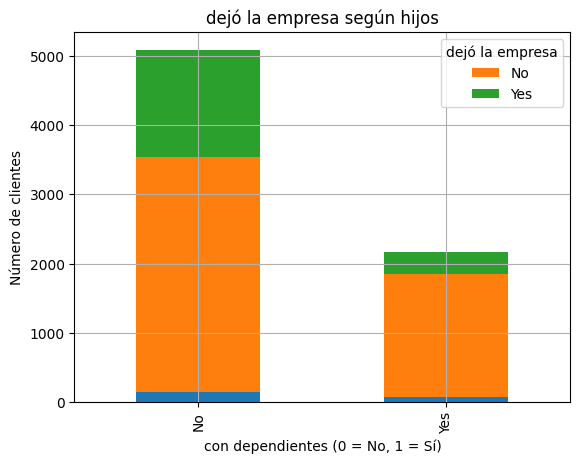

In [ ]:
tabla_hijos.plot(kind='bar', stacked=True)

plt.title('dejó la empresa según hijos')
plt.xlabel('con dependientes (0 = No, 1 = Sí)')
plt.ylabel('Número de clientes')
plt.legend(title='dejó la empresa')
plt.grid(True)
plt.show()

como podemos ver los clientes con hijos tienden a permanecer mas en la empresa

##Genero

In [ ]:
tabla_genero= pd.crosstab(df['customer.gender'], df['Churn'])
print(tabla_genero)

Churn                   No  Yes
customer.gender                
Female           104  2544  939
Male             120  2619  930


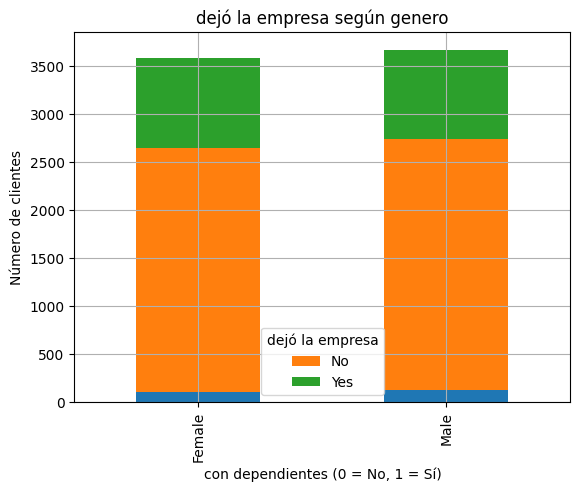

In [ ]:
tabla_genero.plot(kind='bar', stacked=True)

plt.title('dejó la empresa según genero')
plt.xlabel('con dependientes (0 = No, 1 = Sí)')
plt.ylabel('Número de clientes')
plt.legend(title='dejó la empresa')
plt.grid(True)
plt.show()

los resultados son muy similares por loq ue se deduce que el genero no es un facotor determinante si el clientes se va o se queda en la empresa

#Antigüedad del cliente

In [ ]:
tenure_churn_no = df[df['Churn'] == 'No']['customer.tenure']
tenure_churn_yes = df[df['Churn'] == 'Yes']['customer.tenure']


/tmp/ipython-input-23-3627422194.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([tenure_churn_no, tenure_churn_yes], labels=['No', 'Yes'])


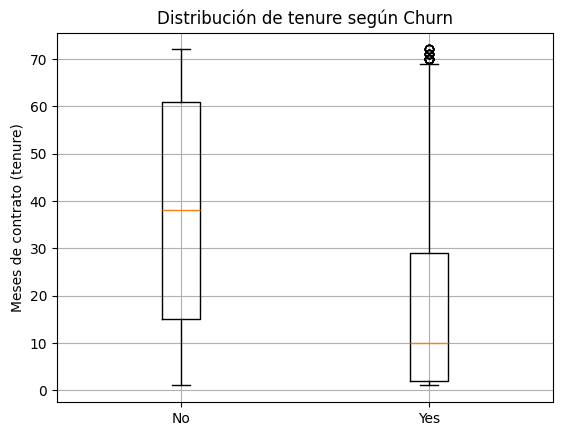

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot([tenure_churn_no, tenure_churn_yes], labels=['No', 'Yes'])
plt.title('Distribución de tenure según Churn')
plt.ylabel('Meses de contrato (tenure)')
plt.grid(True)
plt.show()


La mayoría de los clientes que cancelaron su contrato (Churn=Yes) tienen menor antigüedad (`tenure`), con una mediana cercana a los 10 meses.
En contraste, los clientes que permanecieron (Churn=No) tienen una mediana de ~37 meses y mayor rango de antigüedad.
Esto sugiere que los clientes nuevos tienden a cancelar más fácilmente.

## ✅ **3️⃣ Servicios y características del contrato**
Variables relacionadas con el tipo de contrato y los servicios contratados:
- `account.Contract` (mes a mes, 1 año, 2 años)
- `phone.PhoneService`, `phone.MultipleLines`
- `internet.InternetService`
- Servicios adicionales: `OnlineSecurity`, `TechSupport`, `StreamingTV`, etc.



In [ ]:
tabla_Contrato= pd.crosstab(df['account.Contract'], df['Churn'])
print(tabla_Contrato)

Churn                    No   Yes
account.Contract                 
Month-to-month    130  2220  1655
One year           46  1306   166
Two year           48  1637    48


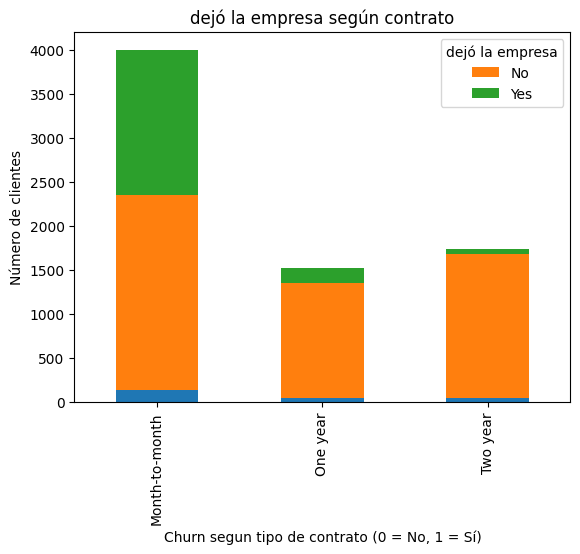

In [ ]:
tabla_Contrato.plot(kind='bar', stacked=True)

plt.title('dejó la empresa según contrato')
plt.xlabel('Churn segun tipo de contrato (0 = No, 1 = Sí)')
plt.ylabel('Número de clientes')
plt.legend(title='dejó la empresa')

#servicios

##Servicio de telefono

In [ ]:
tabla_servicios1= pd.crosstab(df['phone.PhoneService'], df['Churn'])
print(tabla_servicios1)

Churn                      No   Yes
phone.PhoneService                 
No                   25   510   170
Yes                 199  4653  1699


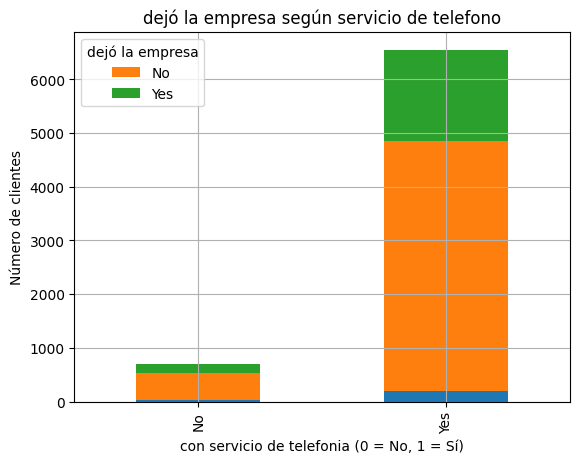

In [ ]:
tabla_servicios1.plot(kind='bar', stacked=True)
plt.title('dejó la empresa según servicio de telefono')
plt.xlabel('con servicio de telefonia (0 = No, 1 = Sí)')
plt.ylabel('Número de clientes')
plt.legend(title='dejó la empresa')
plt.grid(True)
plt.show()

esto nos muestra que no todos los clientes contaban con servicio de telefonia, de aproximadamente 6500 clientes que tenian servicio de telefonia, casi 2mil dejaron la compáñia

por otro lado, de aproximadamente 800 clientes que no contaban con este servicio, 200 no abandonaron la empresa.

#Servicio Multilinea

In [ ]:
tabla_servicios2= pd.crosstab(df['phone.MultipleLines'], df['Churn'])
print(tabla_servicios2)

Churn                       No  Yes
phone.MultipleLines                
No                   105  2536  849
No phone service      25   510  170
Yes                   94  2117  850


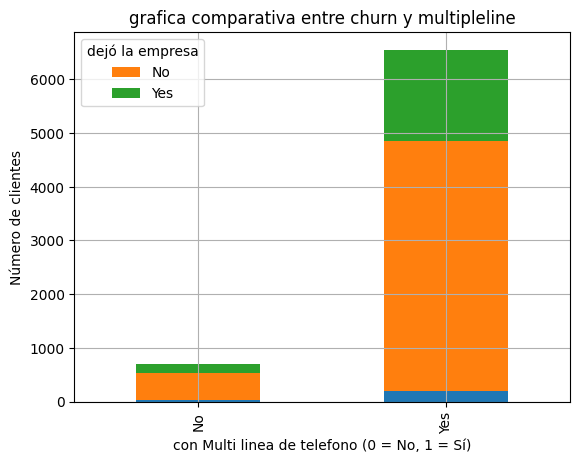

In [ ]:
tabla_servicios1.plot(kind='bar', stacked=True)
plt.title('grafica comparativa entre churn y multipleline')
plt.xlabel('con Multi linea de telefono (0 = No, 1 = Sí)')
plt.ylabel('Número de clientes')
plt.legend(title='dejó la empresa')
plt.grid(True)
plt.show()

#Servicio de internet

In [ ]:
tabla_internet= pd.crosstab(df['internet.InternetService'], df['Churn'])
print(tabla_internet)

Churn                            No   Yes
internet.InternetService                 
DSL                        67  1957   459
Fiber optic               102  1799  1297
No                         55  1407   113


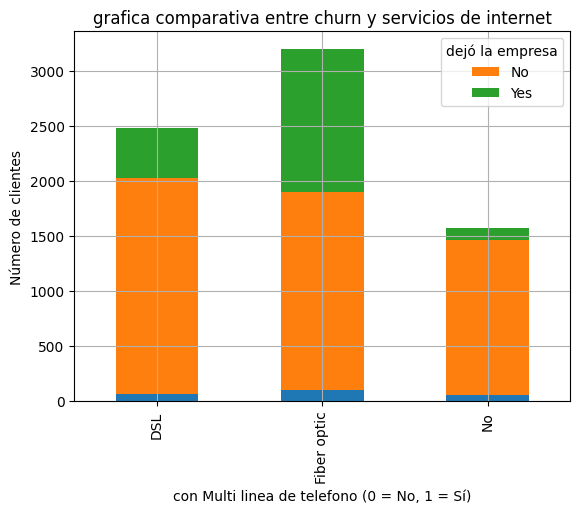

In [ ]:
tabla_internet.plot(kind='bar', stacked=True)
plt.title('grafica comparativa entre churn y servicios de internet')
plt.xlabel('con Multi linea de telefono (0 = No, 1 = Sí)')
plt.ylabel('Número de clientes')
plt.legend(title='dejó la empresa')
plt.grid(True)
plt.show()

## Servicios adicionales vs Churn
Analizaremos uno por uno los siguientes servicios adicionales:
- OnlineSecurity
- TechSupport
- StreamingTV
- StreamingMovies
- DeviceProtection
- OnlineBackup

#OnlineSecurity

In [ ]:
tabla_security=pd.crosstab(df['internet.OnlineSecurity'], df['Churn'])
print(tabla_security)

Churn                           No   Yes
internet.OnlineSecurity                 
No                       110  2036  1461
No internet service       55  1407   113
Yes                       59  1720   295


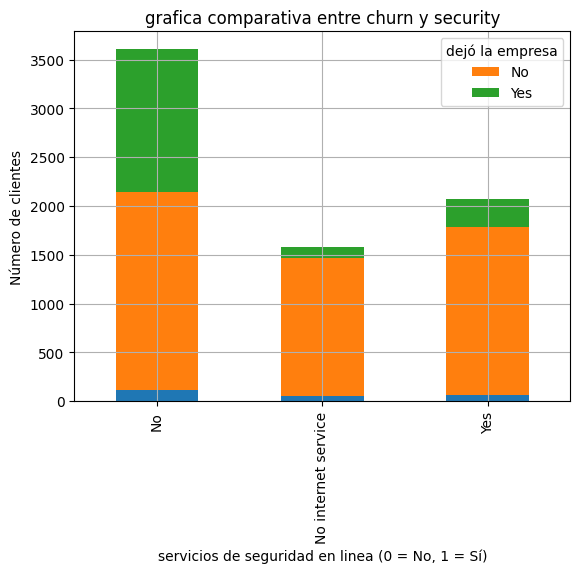

In [ ]:
tabla_security.plot(kind='bar', stacked=True)
plt.title('grafica comparativa entre churn y security')
plt.xlabel('servicios de seguridad en linea (0 = No, 1 = Sí)')
plt.ylabel('Número de clientes')
plt.legend(title='dejó la empresa')
plt.grid(True)
plt.show()

los clientes que no contratan el servicio de seguridad en linea tienden a abandonar la empresa mas que los que si lo contratan

#Tech Support

In [ ]:
tabla_support=pd.crosstab(df['internet.TechSupport'], df['Churn'])
print(tabla_support)

Churn                        No   Yes
internet.TechSupport                 
No                    109  2026  1446
No internet service    55  1407   113
Yes                    60  1730   310


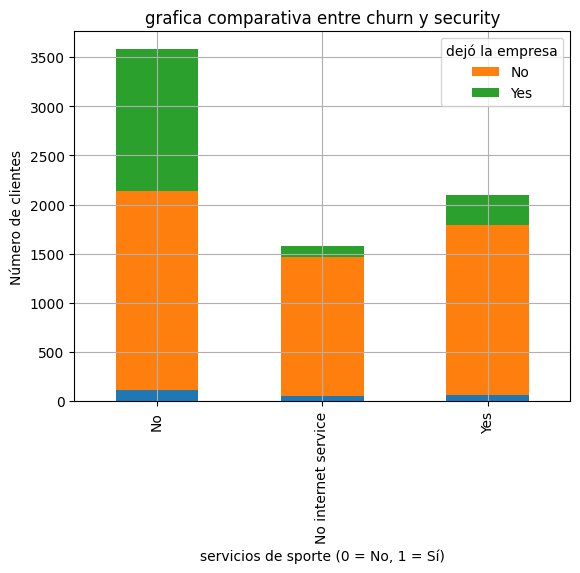

In [ ]:
tabla_support.plot(kind='bar', stacked=True)
plt.title('grafica comparativa entre churn y security')
plt.xlabel('servicios de sporte (0 = No, 1 = Sí)')
plt.ylabel('Número de clientes')
plt.legend(title='dejó la empresa')
plt.grid(True)
plt.show()

los clientes que no contratan servicios de soporte tienden a dejar la compañia aun mas que los que si lo contratan.

#Servicio de Streaming

In [ ]:
tabla_streaming=pd.crosstab(df['internet.StreamingTV'], df['Churn'])
print(tabla_streaming)

Churn                       No  Yes
internet.StreamingTV               
No                    86  1867  942
No internet service   55  1407  113
Yes                   83  1889  814


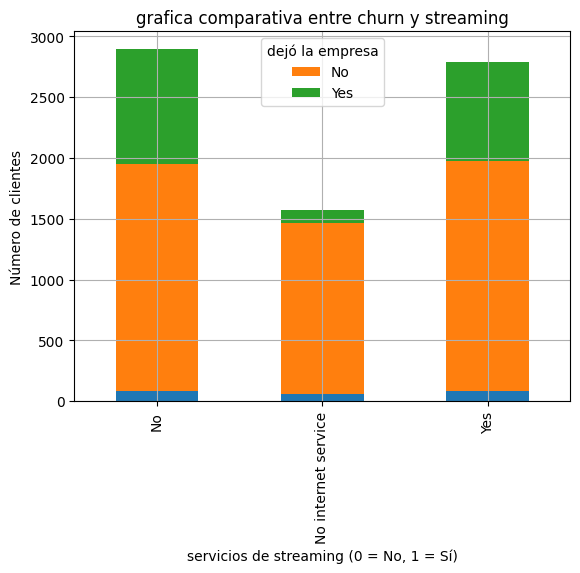

In [ ]:
tabla_streaming.plot(kind='bar', stacked=True)
plt.title('grafica comparativa entre churn y streaming')
plt.xlabel('servicios de streaming (0 = No, 1 = Sí)')
plt.ylabel('Número de clientes')
plt.legend(title='dejó la empresa')
plt.grid(True)
plt.show()

La grafica no muestra gran diferencia entre los clientes que contaban con el servicio de streaming o no

## ✅ **4️⃣ Pagos y gastos**
Variables económicas que podrían influir en la decisión de cancelar:
- `account.Charges.Monthly`: pago mensual
- `account.Charges.Total`: total gastado por el cliente
- `account.PaymentMethod`: forma de pago
- `account.PaperlessBilling`: si recibe factura digital

**Análisis:**
- Boxplot de `Charges.Monthly` vs churn
- Boxplot de `Charges.Total` vs churn
- Gráficos de barras para método de pago y paperless billing vs churn
- Conclusión: ¿los clientes que pagan más o usan ciertos métodos de pago tienden a irse?

In [ ]:
total_no = df[df['Churn'] == 'No']['account.Charges.Total'].dropna()
total_yes = df[df['Churn'] == 'Yes']['account.Charges.Total'].dropna()

In [ ]:
df.groupby('Churn')['account.Charges.Monthly'].agg(['mean', 'median'])
df.groupby('Churn')['account.Charges.Total'].agg(['mean', 'median'])

,mean,median
Churn,,
,2196.933705,1163.175
No,2555.344141,1683.600
Yes,1531.796094,703.550


#Pago mensual

/tmp/ipython-input-41-4250417487.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([monthly_no, monthly_yes], labels=['No', 'Yes'])


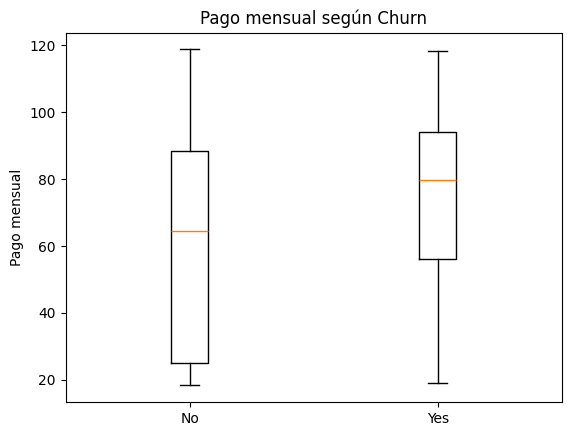

In [ ]:
# Para Charges.Monthly
monthly_no = df[df['Churn'] == 'No']['account.Charges.Monthly']
monthly_yes = df[df['Churn'] == 'Yes']['account.Charges.Monthly']

plt.boxplot([monthly_no, monthly_yes], labels=['No', 'Yes'])
plt.title('Pago mensual según Churn')
plt.ylabel('Pago mensual')
plt.show()

In [ ]:
df.groupby('Churn')['account.Charges.Total'].agg(['mean', 'median'])

,mean,median
Churn,,
,2196.933705,1163.175
No,2555.344141,1683.600
Yes,1531.796094,703.550


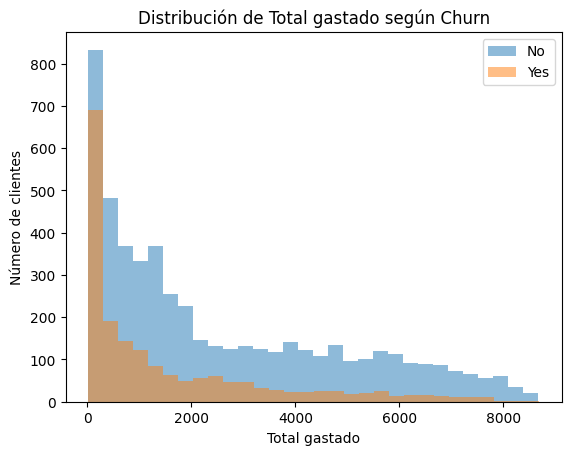

In [ ]:
plt.hist(total_no, bins=30, alpha=0.5, label='No')
plt.hist(total_yes, bins=30, alpha=0.5, label='Yes')
plt.title('Distribución de Total gastado según Churn')
plt.xlabel('Total gastado')
plt.ylabel('Número de clientes')
plt.legend()
plt.show()


La mayoría de los clientes que se fueron (Churn=Yes) tenían un gasto total mucho menor, porque llevaban menos tiempo. El boxplot muestra que su Charges.Total es más bajo, aunque hay algunos outliers que gastaron más.

#📄Informe final

#  Reporte de Análisis de Evasión de Clientes - TelecomX LATAM

## 1.  Extracción de Datos

Se cargaron los datos desde un archivo `.json` y se normalizaron usando `pandas`. La información contiene atributos relacionados con los clientes, sus contratos, servicios contratados y comportamiento de evasión (`Churn`).

## 2. 🛠 Transformación de Datos

- Conversión de columnas a tipos adecuados (por ejemplo, `SeniorCitizen` a booleano).
- Tratamiento de valores nulos y duplicados:
  - Se eliminaron `NaN` y duplicados.
- Se agregó una nueva columna `Cuentas_Diarias` (gasto mensual dividido entre 30).

## 3.  Análisis Descriptivo

### Variables numéricas:
- `tenure`: duración de permanencia del cliente.
- `Charges.Monthly`: pago mensual.
- `Charges.Total`: gasto total.
- `Cuentas_Diarias`: gasto diario estimado.

### Observaciones:
- Clientes con mayor antigüedad tienden a quedarse más tiempo.
- Clientes que se fueron (`Churn=Yes`) tienen menor gasto total, ya que permanecieron menos tiempo.

## 4.  Análisis de Evasión (`Churn`)

### 4.1. Por características demográficas:
- **Edad avanzada** (`SeniorCitizen`) muestra una ligera tendencia a mayor evasión.
- **Clientes sin pareja ni hijos** tienden a abandonar más la empresa.
- **Género**: no se observan diferencias significativas.

### 4.2. Por antigüedad:
- Clientes con menos de 12 meses son más propensos a irse.
- Mediana de `tenure`:
  - Churn=Yes: ~10 meses
  - Churn=No: ~37 meses

## 5.  Servicios y contrato

### Tipo de contrato (`account.Contract`)
- Los contratos mes a mes tienen la mayor tasa de evasión.
- Contratos de 1 o 2 años presentan mayor retención.

### Servicios:
- Clientes **sin telefonía** o **sin múltiples líneas** tienen mayor churn.
- **InternetService** y sus servicios adicionales marcan diferencia:
  - **OnlineSecurity** y **TechSupport** están asociados con menor evasión.
  - Servicios como **StreamingTV** o **StreamingMovies** no afectan significativamente.

## 6.  Pagos y métodos

- Clientes con **mayores pagos mensuales** tienden a quedarse.
- Clientes que **gastaron poco en total** tienden a irse (menos tiempo en la empresa).
- Métodos de pago y facturación electrónica también se analizaron, aunque no se muestran los resultados visuales aquí.

## 7.  Conclusiones

- La **antigüedad** del cliente es uno de los factores más relevantes en la evasión.
- Servicios adicionales como **seguridad online** o **soporte técnico** pueden ayudar a reducir la evasión.
- Contratos **mensuales** presentan más cancelaciones. Ofrecer incentivos para contratos largos puede ser beneficioso.
- Se recomienda enfocar estrategias de retención en:
  - Nuevos clientes (<12 meses).
  - Usuarios sin servicios adicionales.
  - Clientes sin dependientes o pareja.

---
Este análisis puede utilizarse como base para desarrollar modelos predictivos de churn o para diseñar estrategias de fidelización en TelecomX LATAM._
